In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

import statsmodels.api as sm
from statsmodels.formula.api import ols

from rdkit import Chem
from rdkit.Chem import DataStructs
from rdkit.Chem import rdMolDescriptors

In [2]:
traindf = pd.read_csv("../data/train.csv")
testdf = pd.read_csv("../data/holdout.csv")
peptidedf = pd.read_csv("../data/peptide.csv")

In [4]:
traininchi = [Chem.MolToInchiKey(Chem.MolFromSmiles(smi)) for smi in traindf.SMILES]
testinchi = [Chem.MolToInchiKey(Chem.MolFromSmiles(smi)) for smi in testdf.SMILES]
peptideinchi = [Chem.MolToInchiKey(Chem.MolFromSmiles(smi)) for smi in peptidedf.SMILES]

In [5]:
# make sure no overlap molecule
print(set(traininchi).intersection(set(testinchi)))
print(set(traininchi).intersection(set(peptideinchi)))

set()
set()


# Model 1

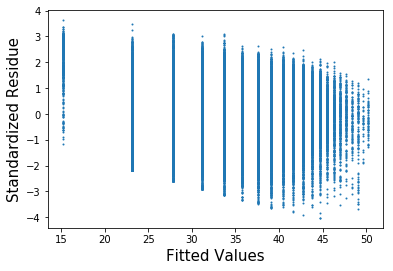

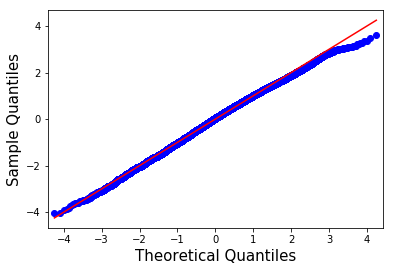

                            OLS Regression Results                            
Dep. Variable:            ConfEntropy   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                 2.817e+04
Date:                Sat, 27 Feb 2021   Prob (F-statistic):               0.00
Time:                        16:44:12   Log-Likelihood:            -3.5291e+05
No. Observations:               93021   AIC:                         7.058e+05
Df Residuals:                   93019   BIC:                         7.058e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              15.2430    

In [15]:
# Model 1
lm1 = ols('ConfEntropy~np.log1p(NumRotors)', traindf).fit()

# Residue Plot and Q-Q Plot
plt.scatter(lm1.fittedvalues,lm1.resid_pearson,s=1)
plt.xlabel("Fitted Values", size=15)
plt.ylabel("Standardized Residue", size=15)
plt.show()

sm.qqplot(lm1.resid_pearson,line="s")
plt.xlabel("Theoretical Quantiles", size=15)
plt.ylabel("Sample Quantiles", size=15)
plt.show()

print(lm1.summary())

 # Model 2

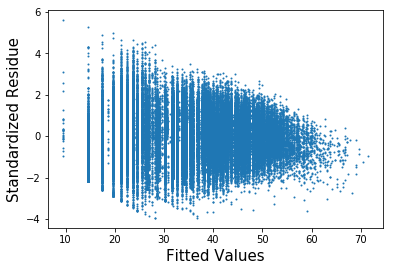

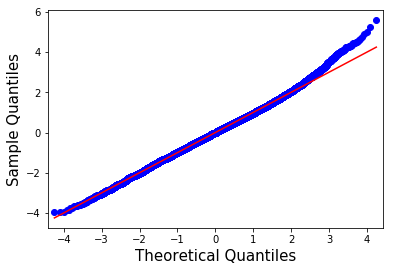

                            OLS Regression Results                            
Dep. Variable:            ConfEntropy   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                 1.061e+05
Date:                Sat, 27 Feb 2021   Prob (F-statistic):               0.00
Time:                        16:44:16   Log-Likelihood:            -3.0994e+05
No. Observations:               93021   AIC:                         6.199e+05
Df Residuals:                   93018   BIC:                         6.199e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               9.4922    

In [16]:
# Model 2
lm2 = ols('ConfEntropy~np.log1p(NumRotors)+np.log1p(NumMethyl)', traindf).fit()

# Residue Plot and  Q-Q Plot
plt.scatter(lm2.fittedvalues,lm2.resid_pearson,s=1)
plt.xlabel("Fitted Values", size=15)
plt.ylabel("Standardized Residue", size=15)
plt.show()

sm.qqplot(lm2.resid_pearson,line="s")
plt.xlabel("Theoretical Quantiles", size=15)
plt.ylabel("Sample Quantiles", size=15)
plt.show()

print(lm2.summary())

# Model 3

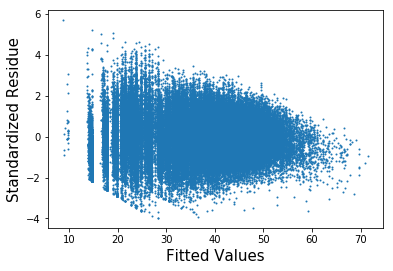

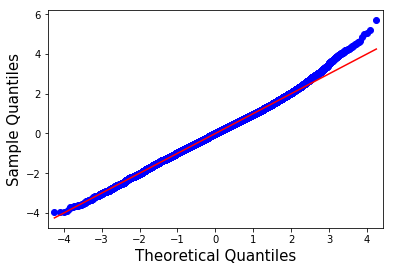

                            OLS Regression Results                            
Dep. Variable:            ConfEntropy   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                 7.094e+04
Date:                Sat, 27 Feb 2021   Prob (F-statistic):               0.00
Time:                        16:44:20   Log-Likelihood:            -3.0985e+05
No. Observations:               93021   AIC:                         6.197e+05
Df Residuals:                   93017   BIC:                         6.198e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               9.7857    

In [17]:
# Model 3
lm3 = ols('ConfEntropy~np.log1p(NumRotors)+np.log1p(NumMethyl)+np.log1p(Ring)', traindf).fit()

# Residue Plot and  Q-Q Plot
plt.scatter(lm3.fittedvalues,lm3.resid_pearson,s=1)
plt.xlabel("Fitted Values", size=15)
plt.ylabel("Standardized Residue", size=15)
plt.show()

sm.qqplot(lm3.resid_pearson,line="s")
plt.xlabel("Theoretical Quantiles", size=15)
plt.ylabel("Sample Quantiles", size=15)
plt.show()

print(lm3.summary())

# Model 4

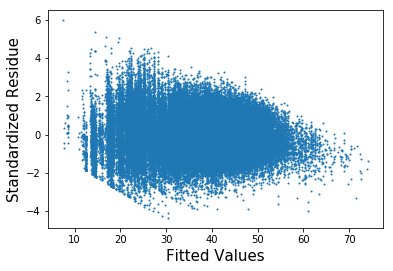

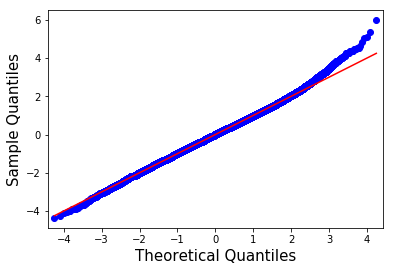

                            OLS Regression Results                            
Dep. Variable:            ConfEntropy   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                 5.569e+04
Date:                Sat, 27 Feb 2021   Prob (F-statistic):               0.00
Time:                        16:44:23   Log-Likelihood:            -3.0837e+05
No. Observations:               93021   AIC:                         6.167e+05
Df Residuals:                   93016   BIC:                         6.168e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               8.5558    

In [18]:
# Model 4
lm4 = ols('ConfEntropy~np.log1p(NumRotors)+np.log1p(NumMethyl)+np.log1p(Ring)+np.log1p(SG)'
          , traindf).fit()

# Residue Plot and  Q-Q Plot
plt.scatter(lm4.fittedvalues,lm4.resid_pearson,s=1)
plt.xlabel("Fitted Values", size=15)
plt.ylabel("Standardized Residue", size=15)
plt.show()

sm.qqplot(lm4.resid_pearson,line="s")
plt.xlabel("Theoretical Quantiles", size=15)
plt.ylabel("Sample Quantiles", size=15)
plt.show()

print(lm4.summary())

# Model 5

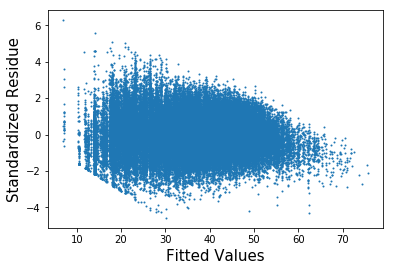

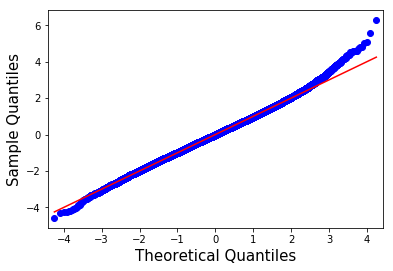

                            OLS Regression Results                            
Dep. Variable:            ConfEntropy   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                 4.083e+04
Date:                Sat, 27 Feb 2021   Prob (F-statistic):               0.00
Time:                        16:47:15   Log-Likelihood:            -3.0520e+05
No. Observations:               93021   AIC:                         6.104e+05
Df Residuals:                   93014   BIC:                         6.105e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               7.2278    

In [24]:
# Model 5
lm5 = ols('ConfEntropy~np.log1p(NumRotors)+np.log1p(NumMethyl)+np.log1p(Ring)+np.log1p(SG)+np.log1p(HBond)+np.log1p(PiStack)'
          , traindf).fit()

# Residue Plot and  Q-Q Plot
plt.scatter(lm5.fittedvalues,lm5.resid_pearson,s=1)
plt.xlabel("Fitted Values", size=15)
plt.ylabel("Standardized Residue", size=15)
plt.show()

sm.qqplot(lm5.resid_pearson,line="s")
plt.xlabel("Theoretical Quantiles", size=15)
plt.ylabel("Sample Quantiles", size=15)
plt.show()

print(lm5.summary())

# Performance on Holdout Test Set and Peptides Test Set

In [25]:
# Training set
print("Model 1 MAE (Trianing set): %.3f" %(mean_absolute_error(traindf["ConfEntropy"],lm1.predict(traindf))))
print("Model 2 MAE (Trianing set): %.3f" %(mean_absolute_error(traindf["ConfEntropy"],lm2.predict(traindf))))
print("Model 3 MAE (Trianing set): %.3f" %(mean_absolute_error(traindf["ConfEntropy"],lm3.predict(traindf))))
print("Model 4 MAE (Training set): %.3f" %(mean_absolute_error(traindf["ConfEntropy"],lm4.predict(traindf))))
print("Model 5 MAE (Training set): %.3f" %(mean_absolute_error(traindf["ConfEntropy"],lm5.predict(traindf))))


Model 1 MAE (Trianing set): 8.665
Model 2 MAE (Trianing set): 5.337
Model 3 MAE (Trianing set): 5.330
Model 4 MAE (Training set): 5.254
Model 5 MAE (Training set): 5.078


In [26]:
# Holdout test set
print("Model 1 MAE (holdout test-set): %.3f" %(mean_absolute_error(testdf["ConfEntropy"],lm1.predict(testdf))))
print("Model 2 MAE (holdout test-set): %.3f" %(mean_absolute_error(testdf["ConfEntropy"],lm2.predict(testdf))))
print("Model 3 MAE (holdout test-set): %.3f" %(mean_absolute_error(testdf["ConfEntropy"],lm3.predict(testdf))))
print("Model 4 MAE (holdout test-set): %.3f" %(mean_absolute_error(testdf["ConfEntropy"],lm4.predict(testdf))))
print("Model 5 MAE (holdout test-set): %.3f" %(mean_absolute_error(testdf["ConfEntropy"],lm5.predict(testdf))))


Model 1 MAE (holdout test-set): 8.832
Model 2 MAE (holdout test-set): 4.887
Model 3 MAE (holdout test-set): 4.897
Model 4 MAE (holdout test-set): 4.867
Model 5 MAE (holdout test-set): 4.791


In [22]:
# Peptides test set
print("Model 1 MAE (peptides test-set): %.3f" %(mean_absolute_error(peptidedf["ConfEntropy"],lm1.predict(peptidedf))))
print("Model 2 MAE (peptides test-set): %.3f" %(mean_absolute_error(peptidedf["ConfEntropy"],lm2.predict(peptidedf))))
print("Model 3 MAE (peptides test-set): %.3f" %(mean_absolute_error(peptidedf["ConfEntropy"],lm3.predict(peptidedf))))
print("Model 4 MAE (peptides test-set): %.3f" %(mean_absolute_error(peptidedf["ConfEntropy"],lm4.predict(peptidedf))))
print("Model 5 MAE (peptides test-set): %.3f" %(mean_absolute_error(peptidedf["ConfEntropy"],lm5.predict(peptidedf))))


Model 1 MAE (peptides test-set): 9.004
Model 2 MAE (peptides test-set): 4.623
Model 3 MAE (peptides test-set): 4.554
Model 4 MAE (peptides test-set): 4.561
Model 5 MAE (peptides test-set): 4.454
